<a href="https://colab.research.google.com/github/dasigiraghu96/Deeplearning_Computer_Vision/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
test_all = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 1000,
                                            class_mode = 'binary')
x_test,y_test=test_all.next()
print(x_test.shape)

Found 1000 images belonging to 2 classes.
(1000, 64, 64, 3)


In [19]:
y_test[0]

1.0

In [6]:
from tensorflow.keras.layers import Conv2D

In [7]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',
                               data_format="channels_last",input_shape=(64,64,3)))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(128,activation='relu'))

cnn.add(tf.keras.layers.Dense(84,activation='relu'))

cnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
63/63 [==============================] - 1107s 17s/step - loss: 0.7003 - accuracy: 0.5267 - val_loss: 0.6900 - val_accuracy: 0.5100
Epoch 2/10
63/63 [==============================] - 12s 186ms/step - loss: 0.6933 - accuracy: 0.5133 - val_loss: 0.6965 - val_accuracy: 0.5080
Epoch 3/10
63/63 [==============================] - 12s 186ms/step - loss: 0.6814 - accuracy: 0.5715 - val_loss: 0.6496 - val_accuracy: 0.6030
Epoch 4/10
63/63 [==============================] - 12s 185ms/step - loss: 0.6351 - accuracy: 0.6617 - val_loss: 0.6421 - val_accuracy: 0.6350
Epoch 5/10
63/63 [==============================] - 12s 184ms/step - loss: 0.5957 - accuracy: 0.6948 - val_loss: 0.6030 - val_accuracy: 0.6700
Epoch 6/10
63/63 [==============================] - 11s 183ms/step - loss: 0.5914 - accuracy: 0.7108 - val_loss: 0.5883 - val_accuracy: 0.6980
Epoch 7/10
63/63 [==============================] - 12s 183ms/step - loss: 0.6066 - accuracy: 0.6853 - val_loss: 0.5756 - val_accuracy: 0.6920

In [10]:
from tensorflow.keras.models import load_model
cnn.save('/content/drive/MyDrive/cats_and_dogs_filtered/model_cat_dog.h5')


In [12]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/cats_and_dogs_filtered/model_cat_dog.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
test_image=load_img('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats/cat.2000.jpg',target_size=(64,64))
test_image=img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)


if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

print

The image classified is cat


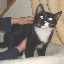

In [14]:
test=load_img('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats/cat.2000.jpg',target_size=(64,64))
test

In [14]:
##Create CNN model and keras hyperturning

In [33]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=c721f7cf885f7747aa0855abcb28bca385f784c96c4998a95d7156b8d0dbee6c
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=599fb4c030c4b75293e4d8e2f54d2e6d4cbb33a6fc3badce49dcf539f1e024d5
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [36]:
tf.__version__

'2.4.1'

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model(hp):
  cnn=tf.keras.models.Sequential()
  for i in range(hp.Int('num_layers', 2, 10)):
    cnn.add(tf.keras.layers.Conv2D(filters=hp.Int('filters_conv'+str(i),min_value=32,max_value=128,step=16),
                                 kernel_size=hp.Choice('kernel_conv'+str(i),values = [3,5,7]),
                                 padding='same',
                                 activation='relu',data_format="channels_last",input_shape=(64,64,3)))

  cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

  cnn.add(tf.keras.layers.Flatten())

  cnn.add(tf.keras.layers.Dense(128,activation='relu'))

  cnn.add(tf.keras.layers.Dense(84,activation='relu'))

  cnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))

  cnn.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[0.1,1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return cnn

In [38]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [49]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='/content/drive/MyDrive/cats_and_dogs_filtered/output',
                          project_name="dog_cat")

INFO:tensorflow:Reloading Oracle from existing project /content/drive/MyDrive/cats_and_dogs_filtered/output/dog_cat/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/MyDrive/cats_and_dogs_filtered/output/dog_cat/tuner0.json


In [50]:
tuner_search.search_space_summary()

Search space summary
Default search space size: 16
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
filters_conv0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
kernel_conv0 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5, 7], 'ordered': True}
filters_conv1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
kernel_conv1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5, 7], 'ordered': True}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
filters_conv2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
kernel_conv2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5, 7], 'ordered': True}
filters_conv3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1

In [41]:
import numpy as np
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
x_train=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y_train=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x_train.shape)
print(y_train.shape)

Found 2000 images belonging to 2 classes.
(2000, 64, 64, 3)
(2000,)


In [42]:
test_generator=test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
x_test=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y_test=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
print(x_test.shape)
print(y_test.shape)

Found 1000 images belonging to 2 classes.
(1000, 64, 64, 3)
(1000,)


In [51]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.1)

INFO:tensorflow:Oracle triggered exit


In [44]:
model=tuner_search.get_best_models(num_models=1)[0]

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 96)        2688      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       110720    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        36896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [47]:
model.fit(x_train,y_train,epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
57/57 [==============================] - 2s 30ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
Epoch 5/10
57/57 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
Epoch 6/10
57/57 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
Epoch 7/10
57/57 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
Epoch 8/10
57/57 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
Epoch 9/10
57/57 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
Epoch 10/10
57/57 [==============================] - 2s 28ms/step - loss: nan - accuracy: 0.4983 - val_loss: nan - val_accuracy: 0.5150
